In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

UFC_FINAL = pd.read_csv("UFC_FINAL.csv")
# tackling imbalance issue
#theMin = UFC_FINAL["Winner"].value_counts().min()
#minority = UFC_FINAL[UFC_FINAL["Winner"]=="Blue"].iloc[0:theMin]
#undersampleMaj = UFC_FINAL[UFC_FINAL["Winner"]=="Red"].iloc[0:theMin]
#UFC_FINAL = pd.concat([minority, undersampleMaj], axis=0)
#UFC_FINAL = UFC_FINAL.sample(frac=1).reset_index(drop=True)
UFC_FINAL["Winner"].value_counts()

Red     3142
Blue    1493
Name: Winner, dtype: int64

X_train shape: (3476, 42) | X_test shape: (1159, 42) | y_train shape: (3476,) | y_test shape: (1159,)
Train on 3476 samples, validate on 1159 samples
Epoch 1/600
3476/3476 [==============================] - 1s 215us/sample - loss: 0.6682 - accuracy: 0.6300 - val_loss: 0.6472 - val_accuracy: 0.6644
Epoch 2/600
3476/3476 [==============================] - 0s 46us/sample - loss: 0.6418 - accuracy: 0.6812 - val_loss: 0.6449 - val_accuracy: 0.6644
Epoch 3/600
3476/3476 [==============================] - 0s 45us/sample - loss: 0.6381 - accuracy: 0.6812 - val_loss: 0.6373 - val_accuracy: 0.6644
Epoch 4/600
3476/3476 [==============================] - 0s 45us/sample - loss: 0.6337 - accuracy: 0.6818 - val_loss: 0.6367 - val_accuracy: 0.6644
Epoch 5/600
3476/3476 [==============================] - 0s 46us/sample - loss: 0.6304 - accuracy: 0.6824 - val_loss: 0.6373 - val_accuracy: 0.6644
Epoch 6/600
3476/3476 [==============================] - 0s 45us/sample - loss: 0.6284 - accuracy: 0.6824 - v

0.6721311211585999

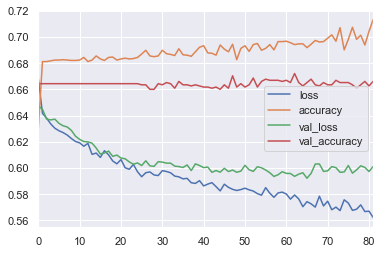

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

# encode blue and red as 1 and 0
UFC_FINAL["Winner"] = UFC_FINAL["Winner"].replace("Blue", 1)
UFC_FINAL["Winner"] = UFC_FINAL["Winner"].replace("Red", 0)

# separate labels
X = UFC_FINAL.drop("Winner", axis=1).values
y = UFC_FINAL["Winner"].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

# scale
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape} | y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

model = Sequential()

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

model_loss = pd.DataFrame(model.history.history)

model_loss.plot()
model_loss["val_accuracy"].max()
#

In [30]:
UFC_PCA = pd.read_csv("UFC_PCA.csv")
UFC_PCA.head()
UFC_PCA["Winner"] = UFC_PCA["Winner"].replace("Blue",1)
UFC_PCA["Winner"] = UFC_PCA["Winner"].replace("Red",0)

X = UFC_PCA.iloc[:,1:].values
y = UFC_PCA["Winner"].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train shape: (3244, 10) | X_test shape: (1391, 10) | y_train shape: (3244,) | y_test shape: (1391,)
Train on 3244 samples, validate on 1391 samples
Epoch 1/600
3244/3244 [==============================] - 1s 282us/sample - loss: 0.6766 - accuracy: 0.6147 - val_loss: 0.6450 - val_accuracy: 0.6650
Epoch 2/600
3244/3244 [==============================] - 0s 45us/sample - loss: 0.6414 - accuracy: 0.6776 - val_loss: 0.6368 - val_accuracy: 0.6650
Epoch 3/600
3244/3244 [==============================] - 0s 46us/sample - loss: 0.6382 - accuracy: 0.6831 - val_loss: 0.6384 - val_accuracy: 0.6650
Epoch 4/600
3244/3244 [==============================] - 0s 43us/sample - loss: 0.6257 - accuracy: 0.6834 - val_loss: 0.6345 - val_accuracy: 0.6650
Epoch 5/600
3244/3244 [==============================] - 0s 47us/sample - loss: 0.6298 - accuracy: 0.6834 - val_loss: 0.6344 - val_accuracy: 0.6650
Epoch 6/600
3244/3244 [==============================] - 0s 46us/sample - loss: 0.6291 - accuracy: 0.6834 - v

0.6649892330169678

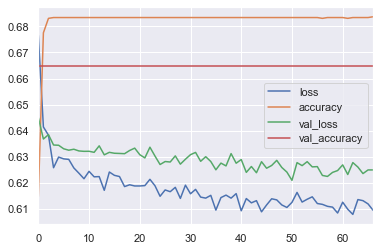

In [32]:
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)

print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape} | y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

model = Sequential()

model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

model_loss = pd.DataFrame(model.history.history)

model_loss.plot()
model_loss["val_accuracy"].max()